In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
from tensorflow.keras.preprocessing import image
import cv2

In [3]:
from skimage.transform import resize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
videoPath='/content/drive/My Drive/An_ComputerVision/Liz.mp4'

In [ ]:
 class VideoHandler:
    def __init__(self):
        pass
    def readVideo(self,path):
       vFile=cv2.VideoCapture(path)
       fRate=vFile.get(5)
       c=0
       while(vFile.isOpened()):
          frameId=vFile.get(1)
          ret,frame=vFile.read()
          if ( ret!=True):
            break
          if (frameId%math.floor(fRate)==0):
            fname="frame%d.jpg"%c
            c+=1
            cv2.imwrite(fname,frame)
 
       vFile.release()

In [ ]:
vh=VideoHandler()

In [ ]:
vh.readVideo(videoPath)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


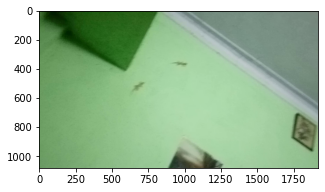

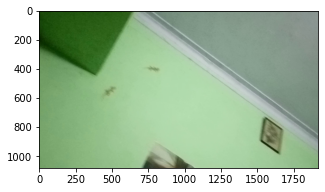

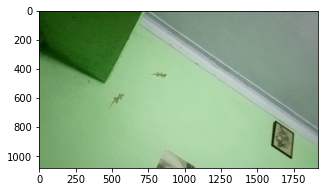

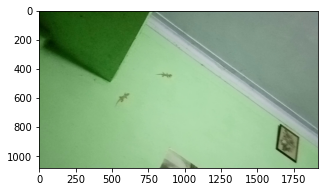

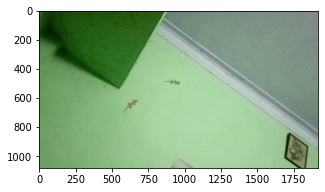

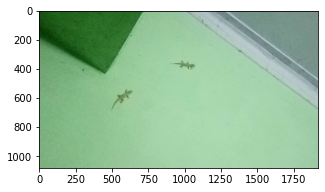

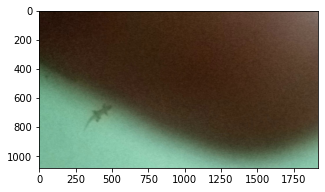

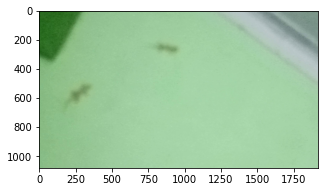

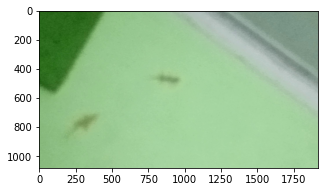

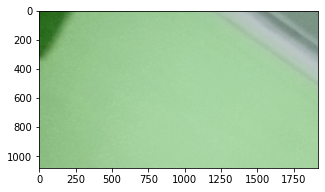

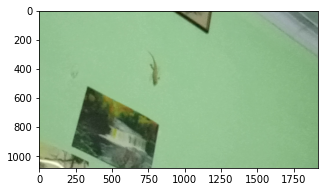

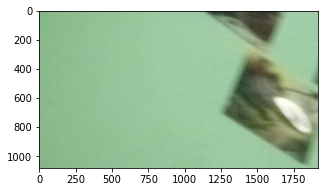

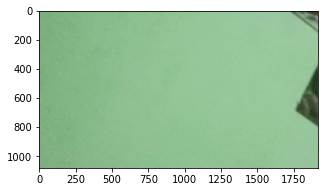

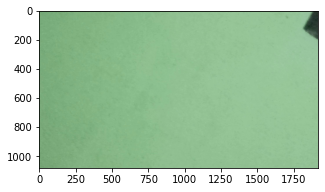

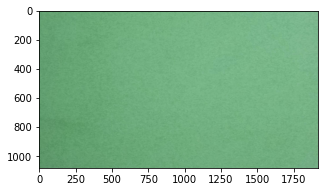

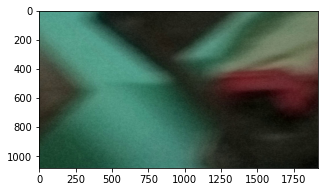

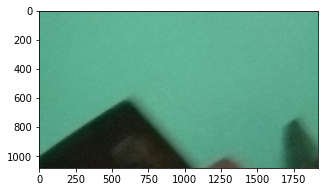

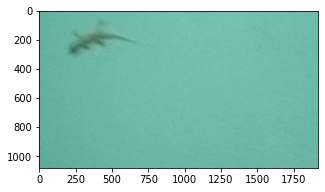

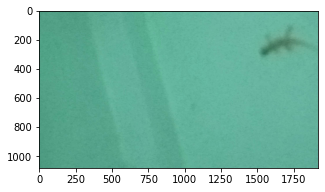

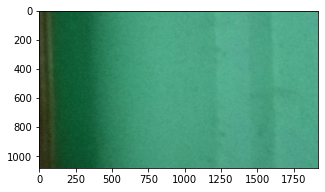

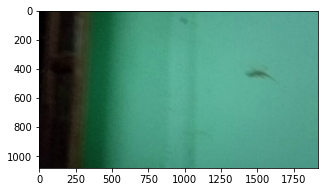

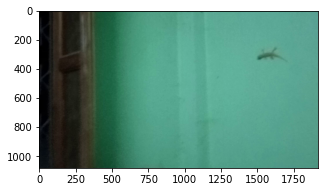

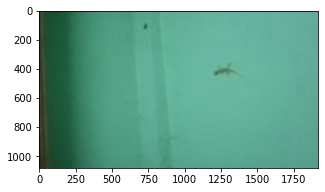

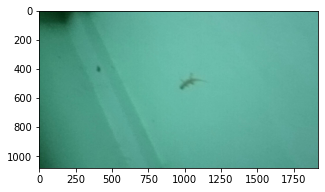

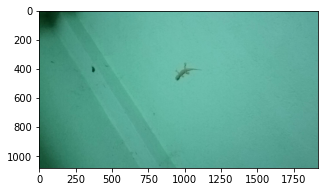

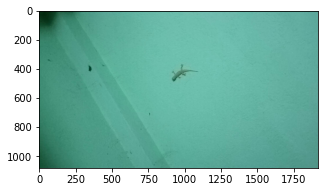

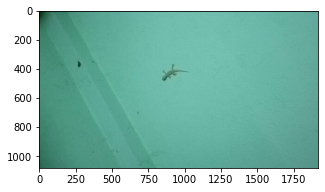

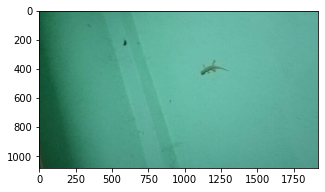

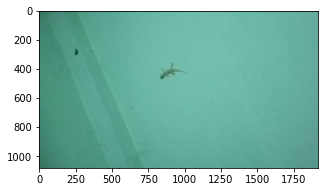

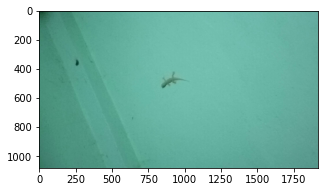

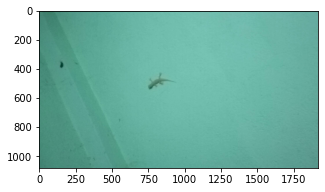

In [ ]:
 
for i in range(31):
  path='/content/frame'+str(i)+'.jpg'
  plt.figure(figsize=(5,5))
  img=plt.imread(path)
  plt.imshow(img)

We see two reptiles in the video. Let us assume one is A and another is B. We will create a dataframe where A and B togather as 1, single as 2, and none as 0

In [ ]:
tr=pd.DataFrame({'imgID':['frame'+str(i)+'.jpg' for i in range(31)], 'Class':[1,1,1,1,1,1,2,1,1,0,2,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0]})

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
class DataProcessing:
    def __init__(self):
        pass
    def splitData(self,tr):
       X=[]
       for nm in tr.imgID:
          X.append(plt.imread(''+nm))
       X=np.array(X)
       Y=tr.Class
       y=to_categorical(Y)
       return X,y
    def formatImg(self,x):
       ''' Format image to VGG16 format'''
       img=[]
       for i in range(x.shape[0]):
          img.append(resize(x[i],preserve_range=True,output_shape=(224,224)).astype(int))
       x=np.array(img)
       return x
    def preprocessImg(self,x):
        x=preprocess_input(x)
        return x
    def get_pretrained_model(self):
       model_base=VGG16(weights='imagenet',include_top=False, input_shape=(224,224,3))
       return model_base
    def extract_features_with_vgg16(self,x, base):
       x=base.predict(x)
       return x
    def separate_trainval(self, features, target):
      X_train,x_val, y_train, y_val=train_test_split(features,target, test_size=.3, random_state=42)
      return X_train,x_val, y_train, y_val
    def normalize_inp(self,x_t, x_v):
       ''' normalize the x values for faster 
        Convergence'''
       x_t=x_t.reshape(x_t.shape[0], x_t.shape[1]*x_t.shape[2]*x_t.shape[3])
       x_v=x_v.reshape(x_v.shape[0], x_v.shape[1]*x_v.shape[2]*x_v.shape[3])
       x_t=x_t/x_t.max()
       x_v=x_v/x_v.max()
       return x_t,x_v

In [ ]:
class ModelBuilding:
   def __init__(self,):
     pass
   def build_model(self):
     model=tf.keras.models.Sequential ()
     model.add(tf.keras.layers.InputLayer(7*7*512,))
     model.add(tf.keras.layers.Dense(units=(1024),activation='sigmoid'))
     model.add(tf.keras.layers.Dense(3,activation='softmax'))
     return model
   def compile_model(self,model):
     model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
     
   def train_model(self,model,x_t,y_t,x_v,y_v):
     model.fit(x_t,y_t,epochs=100,validation_data=(x_v,y_v))
     return model

In [ ]:
dp=DataProcessing()

In [ ]:
X,y=dp.splitData(tr)

In [ ]:
X.shape

(31, 1080, 1920, 3)

In [ ]:
X_fmt=dp.formatImg(X)

In [ ]:
X_fmt.shape

(31, 224, 224, 3)

In [ ]:
X_pp=dp.preprocessImg(X_fmt)

In [ ]:
X_pp.shape

(31, 224, 224, 3)

In [ ]:
A=X_pp.shape
len(A)

4

In [ ]:
b=dp.get_pretrained_model()

In [ ]:
features_ext=dp.extract_features_with_vgg16(X_pp,b)

In [ ]:
features_ext.shape

(31, 7, 7, 512)

In [ ]:
#split into train n val
X_t,x_v, y_t,y_v=dp.separate_trainval(features_ext, y)

In [ ]:
x_t,x_v=dp.normalize_inp(X_t,x_v)

In [ ]:
mb=ModelBuilding()

In [ ]:
m=mb.build_model()

In [ ]:
mb.compile_model(m)

In [ ]:
mb.train_model(m, x_t, y_t,x_v,y_v)

Epoch 1/100
1/1 [==============================] - 0s 131ms/step - loss: 0.9724 - accuracy: 0.5714 - val_loss: 0.6456 - val_accuracy: 0.9000
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 0.4761 - accuracy: 0.8571 - val_loss: 0.5293 - val_accuracy: 0.9000
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2381 - accuracy: 0.9524 - val_loss: 0.4771 - val_accuracy: 0.9000
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 0.1282 - accuracy: 0.9524 - val_loss: 0.4638 - val_accuracy: 0.8000
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0818 - accuracy: 1.0000 - val_loss: 0.4594 - val_accuracy: 0.8000
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0576 - accuracy: 1.0000 - val_loss: 0.4485 - val_accuracy: 0.8000
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0408 - accuracy: 1.0000 - val_loss: 0.4342 - val_accuracy: 0.9000
Epoch 8/100
1/1 [==